In [ ]:
import pandas as pd

df = pd.read_excel('heart_disease.xlsx')
display(df.head())
display(df.info())

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


None

In [ ]:
excel_file = pd.ExcelFile('heart_disease.xlsx')
print(excel_file.sheet_names)

['Description', 'Heart_disease']


In [ ]:
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            908 non-null    int64  
 1   trestbps                       908 non-null    int64  
 2   chol                           908 non-null    int64  
 3   thalch                         908 non-null    int64  
 4   oldpeak                        908 non-null    float64
 5   num                            908 non-null    int64  
 6   sex_Male_True                  908 non-null    bool   
 7   cp_atypical angina_True        908 non-null    bool   
 8   cp_non-anginal_True            908 non-null    bool   
 9   cp_typical angina_True         908 non-null    bool   
 10  fbs_True_True                  908 non-null    bool   
 11  restecg_normal_True            908 non-null    bool   
 12  restecg_st-t abnormality_True  908 non-null    boo

None

In [ ]:
display(df.isnull().sum())

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


**Reasoning**:
Generate histograms for all numerical columns to visualize their distributions.



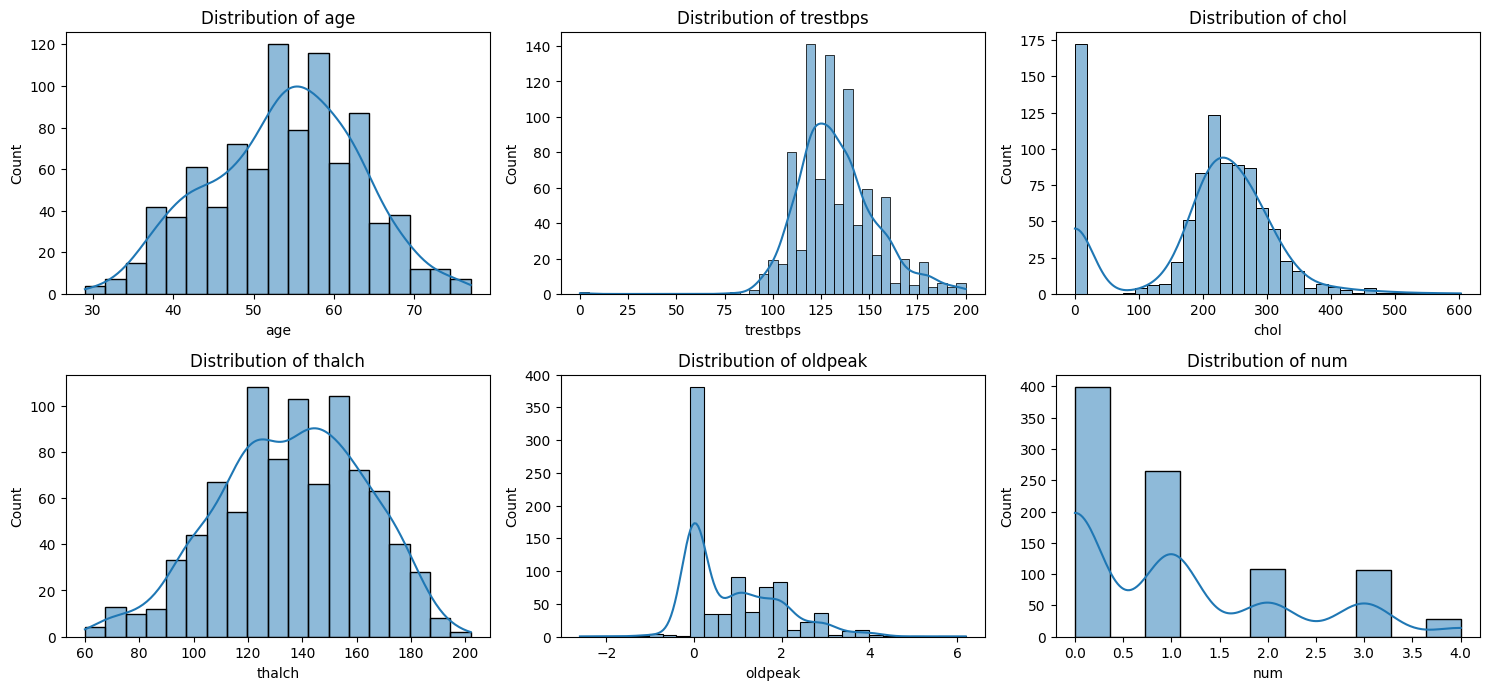

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
Create box plots for all numerical columns to identify potential outliers.



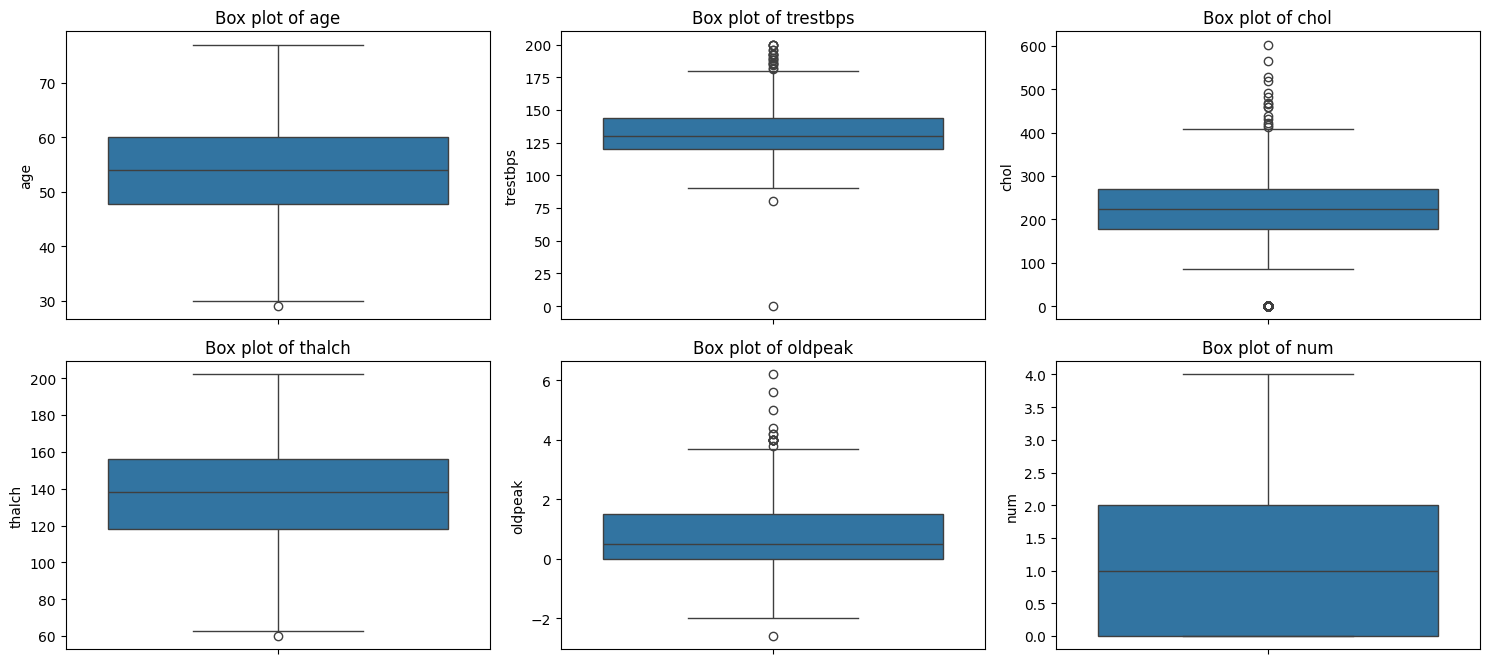

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.217942,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.134945,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.032205,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.112624,-0.323058
oldpeak,0.217942,0.134945,0.032205,-0.112624,1.000000,0.406078
num,0.326493,0.137251,-0.238813,-0.323058,0.406078,1.000000


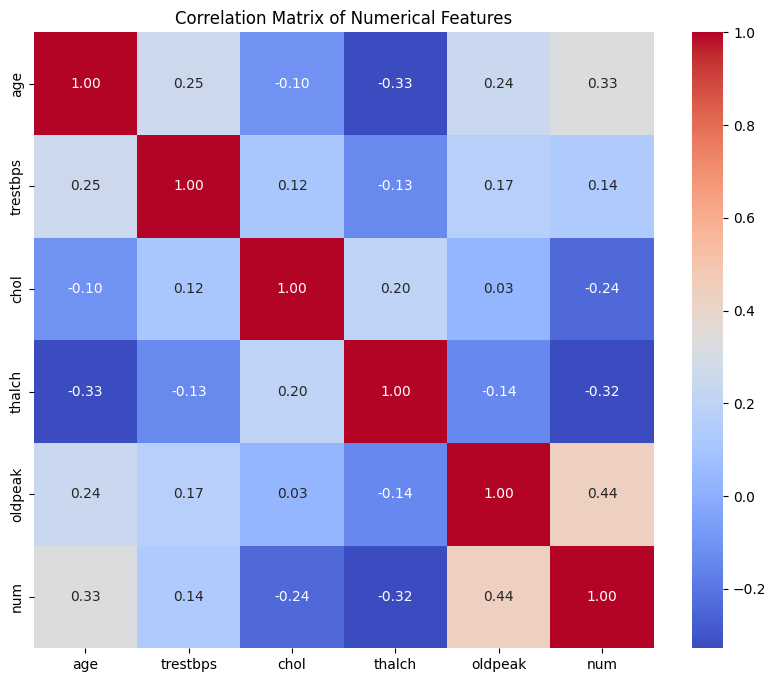

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Handle missing values in 'oldpeak' using median imputation
median_oldpeak = df['oldpeak'].median()
df['oldpeak'].fillna(median_oldpeak, inplace=True)

# Identify categorical columns (excluding numerical ones already analyzed)
categorical_cols = df.select_dtypes(include=['object', 'boolean']).columns

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows and info of the modified dataframe to verify changes
display(df.head())


/tmp/ipython-input-2752711792.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(median_oldpeak, inplace=True)


,age,trestbps,chol,thalch,oldpeak,num,sex_Male_True,cp_atypical angina_True,cp_non-anginal_True,cp_typical angina_True,fbs_True_True,restecg_normal_True,restecg_st-t abnormality_True,exang_True_True,exang_FALSE_True,exang_TURE_True,slope_flat_True,slope_upsloping_True,thal_normal_True,thal_reversable defect_True
0,63,145,233,150,2.3,0,True,False,False,True,True,False,False,False,False,False,False,False,False,False
1,41,135,203,132,0.0,0,True,True,False,False,False,True,False,False,False,False,True,False,False,False
2,57,140,192,148,0.4,0,True,False,False,False,False,True,False,False,False,False,True,False,False,False
3,52,118,186,190,0.0,0,True,False,False,True,False,False,False,False,False,False,True,False,False,False
4,57,110,201,126,1.5,0,True,False,False,False,False,True,False,True,False,False,True,False,False,False


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       908 non-null    int64  
 1   trestbps                  908 non-null    int64  
 2   chol                      908 non-null    int64  
 3   thalch                    908 non-null    int64  
 4   oldpeak                   908 non-null    float64
 5   num                       908 non-null    int64  
 6   sex_Male                  908 non-null    bool   
 7   cp_atypical angina        908 non-null    bool   
 8   cp_non-anginal            908 non-null    bool   
 9   cp_typical angina         908 non-null    bool   
 10  fbs_True                  908 non-null    bool   
 11  restecg_normal            908 non-null    bool   
 12  restecg_st-t abnormality  908 non-null    bool   
 13  exang_True                908 non-null    bool   
 14  exang_FALS

None

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate features (X) and target (y)
# The target variable 'num' is likely the outcome of interest based on the correlation analysis
X = df.drop('num', axis=1)
y = df['num']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [ ]:
  from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Instantiate a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='f1_weighted')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Store the best performing model
best_dt_model = grid_search.best_estimator_

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Make predictions on the test data using the best model
y_pred_tuned = best_dt_model.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted', zero_division=0)

print("Tuned Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-score: {f1_tuned:.4f}")

Tuned Model Evaluation Metrics:
Accuracy: 0.4835
Precision: 0.4664
Recall: 0.4835
F1-score: 0.4741


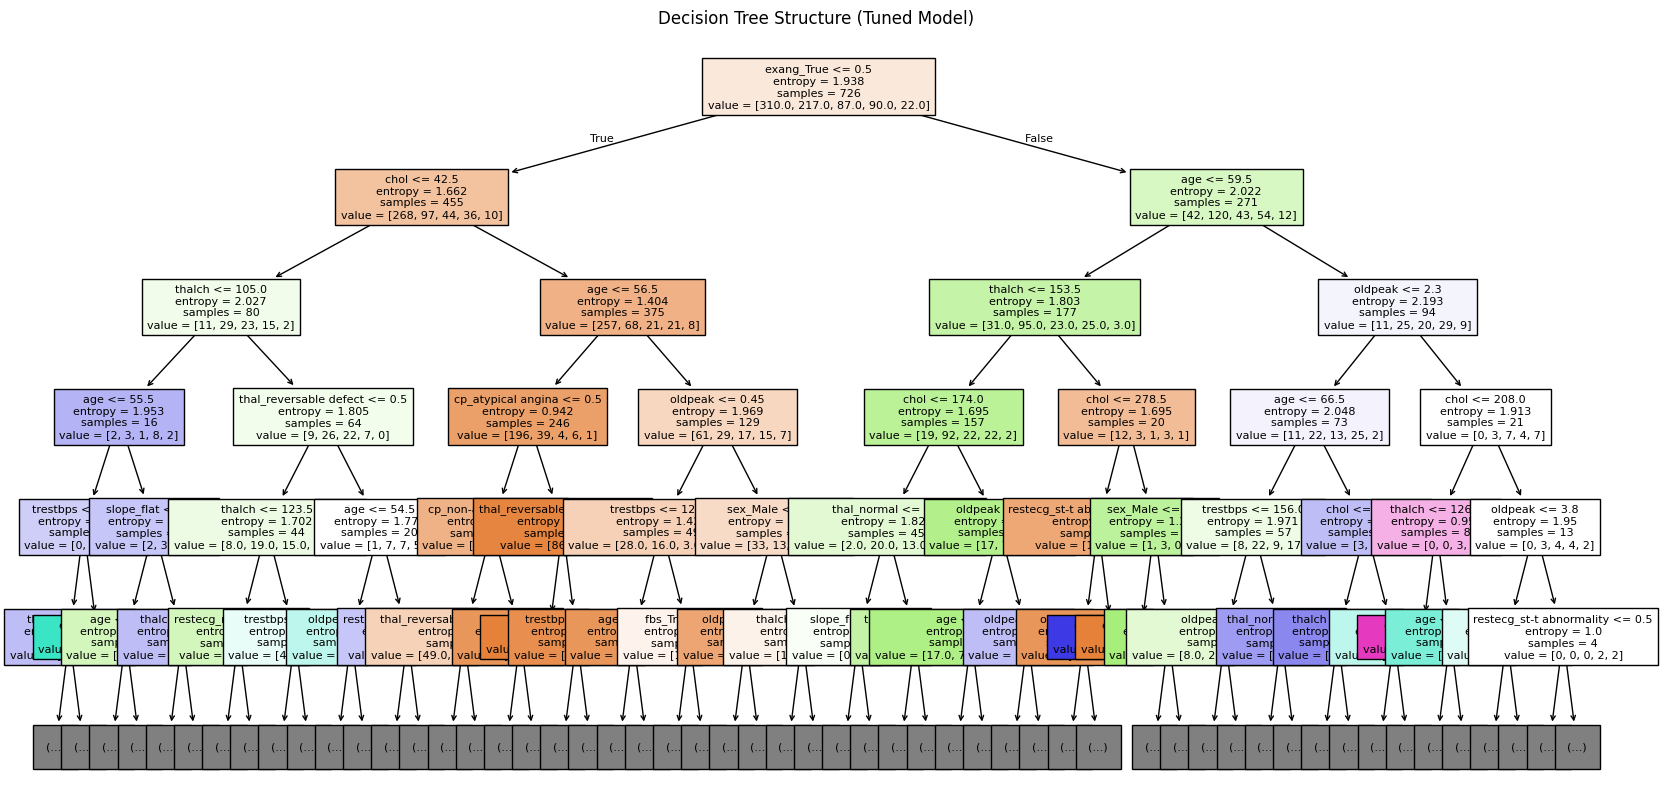

In [ ]:
# Visualize the decision tree (consider limiting depth for large trees)
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=X.columns, filled=True, max_depth=5, fontsize=8) # Limiting depth to 5 for visualization
plt.title("Decision Tree Structure (Tuned Model)")
plt.show()

In [ ]:
# Get and display feature importances
feature_importances = best_dt_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
display(importance_df)


Feature Importances:


,Feature,Importance
0,age,0.186001
3,thalch,0.162798
2,chol,0.139784
4,oldpeak,0.124812
12,exang_True,0.084943
1,trestbps,0.082627
18,thal_reversable defect,0.036371
10,restecg_normal,0.025265
17,thal_normal,0.024641
7,cp_non-anginal,0.021462


### 1. Common Hyperparameters of Decision Tree Models

Decision tree hyperparameters are crucial for controlling the complexity of the model, which helps manage the trade-off between **overfitting** (model is too complex and fits the noise in the training data) and **underfitting** (model is too simple and misses the underlying patterns).

| Hyperparameter | Description | Effect on Performance |
| :--- | :--- | :--- |
| **`max_depth`** | The maximum number of levels (splits) allowed in the tree. | **High Value:** Leads to a deeper, more complex tree. Increases risk of **overfitting**. |
| **`min_samples_split`** | The minimum number of samples a node must contain to be considered for splitting. | **High Value:** Constrains the tree, resulting in fewer splits and a simpler model. Helps prevent **overfitting**. |
| **`min_samples_leaf`** | The minimum number of samples required to be present at a leaf node. | **High Value:** Prunes the tree by forcing leaves to represent a larger population. Helps prevent **overfitting**. |
| **`max_features`** | The number of features (randomly selected) to consider when looking for the best split at each node. | **Low Value:** Introduces randomness and prevents the tree from being dominated by a single strong feature. Helps prevent **overfitting** and is key for ensemble methods like Random Forest. |
| **`criterion`** | The function used to measure the quality of a split (e.g., **Gini impurity** or **entropy/information gain**). | The choice affects how splits are evaluated. It's generally a choice between computational efficiency (Gini) and impurity calculation (Entropy), with less direct impact on complexity than the depth/sample parameters. |

***

### 2. Difference Between Label Encoding and One-Hot Encoding

Both are methods to convert **categorical data** into a numerical format that machine learning algorithms can process. The key difference lies in how they represent the categories and whether they introduce an artificial sense of order (ordinality).

| Feature | Label Encoding | One-Hot Encoding (OHE) |
| :--- | :--- | :--- |
| **What it Does** | Assigns a **unique integer** to each category. | Creates a **new binary column** (0 or 1) for each unique category. |
| **Dimensionality** | **Does NOT increase** dimensionality (1 column remains 1 column). | **Increases** dimensionality (1 column becomes $N$ columns, where $N$ is the number of unique categories). |
| **Suitable Data** | Best for **Ordinal Data** (categories with a natural rank/order, e.g., "Low," "Medium," "High"). | Best for **Nominal Data** (categories with no inherent order, e.g., "Red," "Blue," "Green"). |
| **Key Problem** | **Implies Ordinality:** For nominal data, the assigned integers (e.g., Red=1, Blue=2, Green=3) can mistakenly be interpreted by the model as a ranked relationship ($3 > 2 > 1$). | **High Dimensionality/Sparsity:** Can create too many features if the column has many unique categories. Also risks the **Dummy Variable Trap** (multicollinearity) if all $N$ columns are kept in linear models. |
| **Example** | `[Red, Blue, Red]` $\rightarrow$ `[1, 2, 1]` | `[Red, Blue, Red]` $\rightarrow$ `Red (1, 0, 1)`, `Blue (0, 1, 0)` |